In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [36]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [37]:
df = pd.read_csv(r'C:\Users\UmarFarooque\Desktop\cardio_train.csv',sep=';')

In [38]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [39]:
print(df.shape)

(69301, 13)


In [40]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
df.drop('id',axis=1,inplace=True)

In [42]:
#duplicate removal

In [43]:
df.drop_duplicates(inplace=True)

In [44]:
df.shape

(69277, 12)

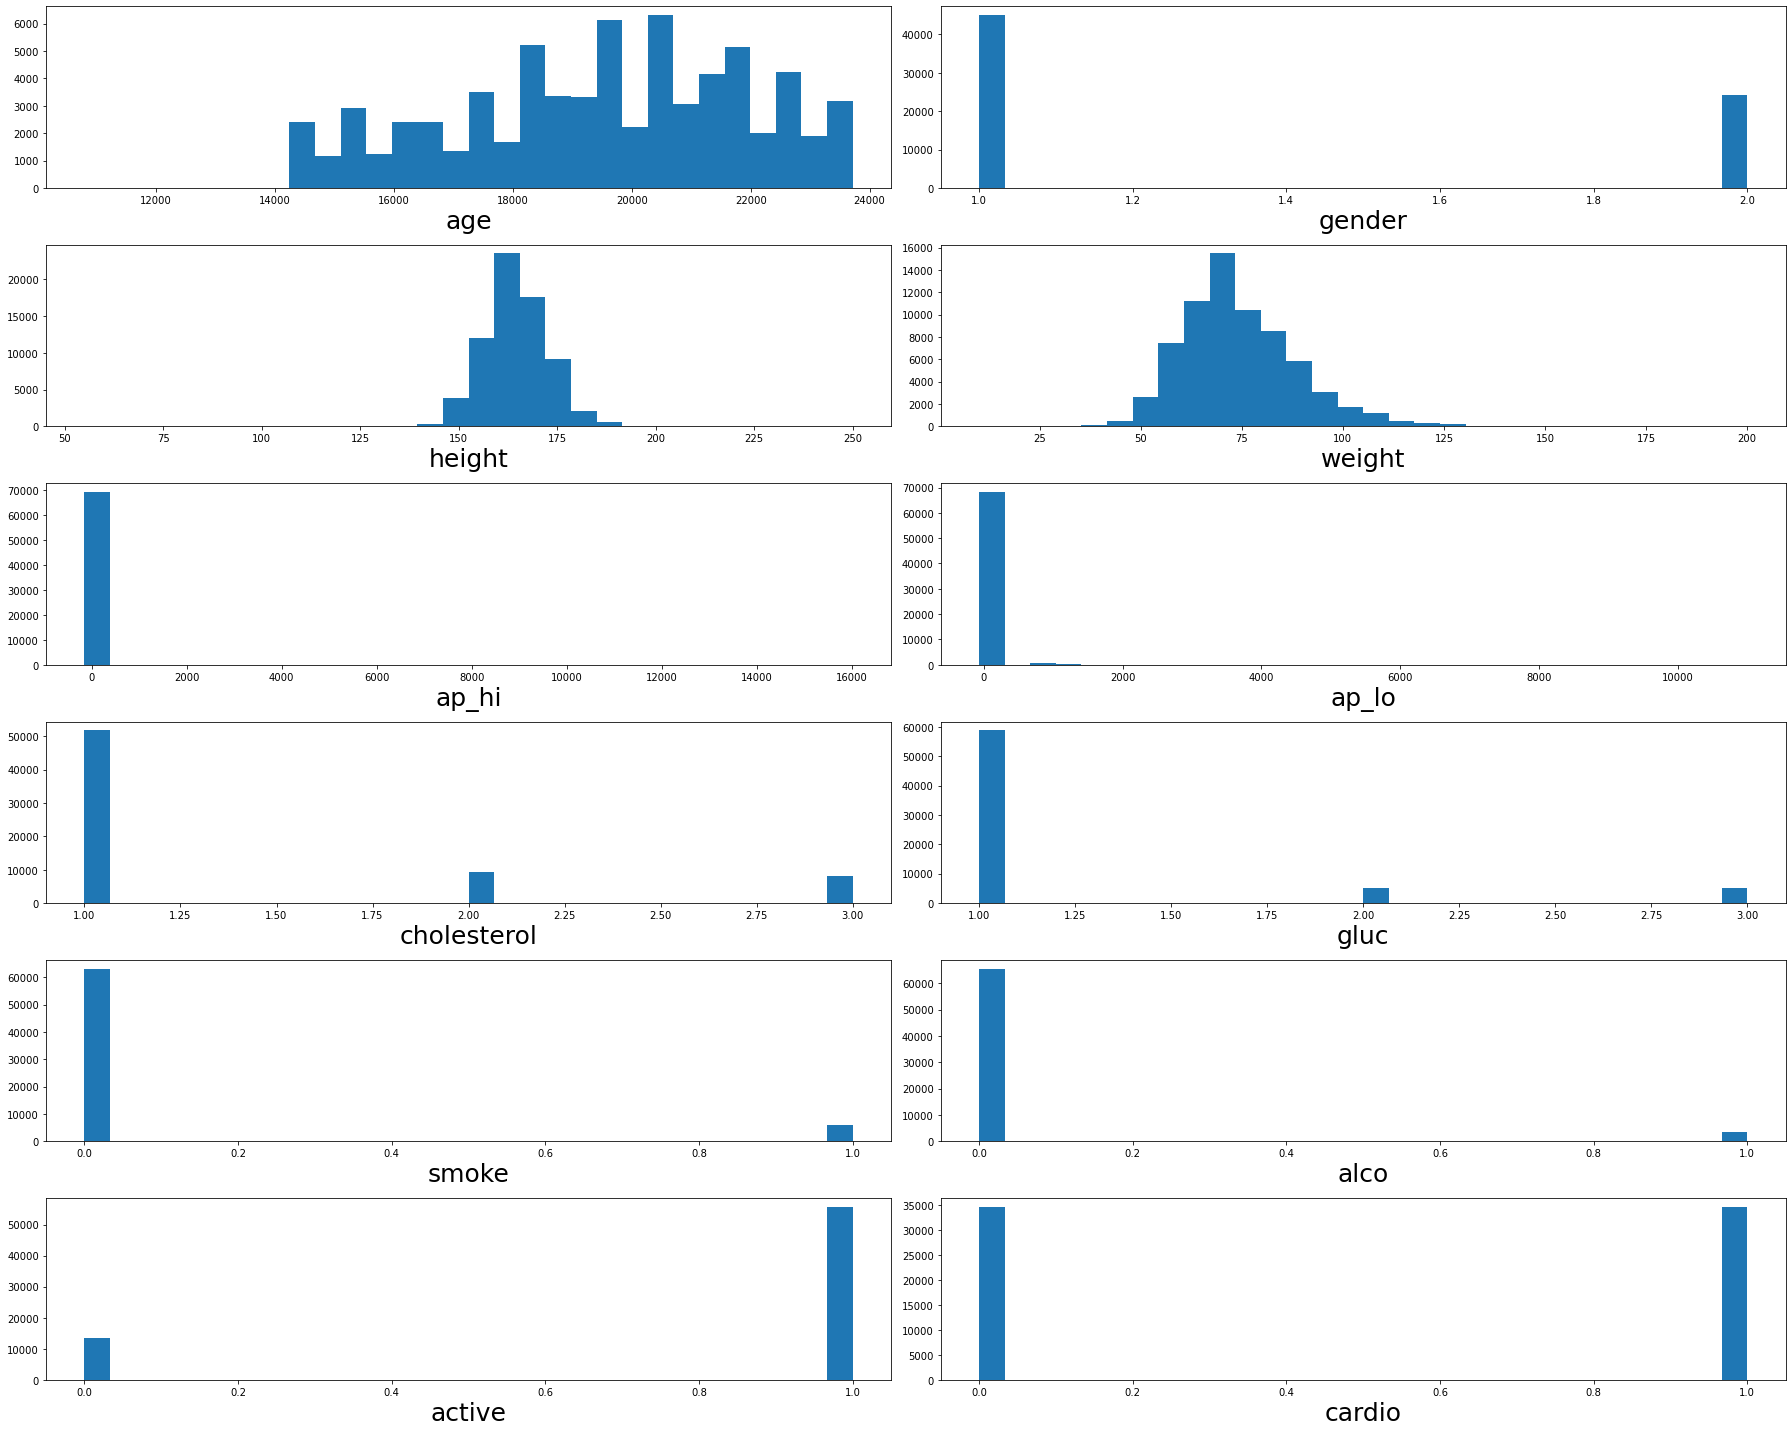

In [45]:
plt.figure(figsize=(25,20))
plotnumber =1
for column in df:
    if plotnumber<=12:
        ax = plt.subplot(6,2,plotnumber)
        plt.hist(df[column],bins=30)
        plt.xlabel(column,fontsize=25)
        
        plotnumber+=1
        
plt.tight_layout()       

In [46]:
from scipy.stats import zscore


In [47]:
z_score = zscore(df[['age','height','ap_hi','weight','ap_lo']])
abs_z_score = np.abs(z_score)
                

In [48]:
filtering_entry = (abs_z_score<=3).all(axis=1)    #abs z score = standard deviation in graph(-3 to +3)

In [49]:
df = df[filtering_entry]

In [50]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000
mean,19466.779053,1.347268,164.374555,73.566278,126.164430,81.286001,1.362010,1.223575,0.087159,0.053281,0.803949,0.492815
std,2467.040240,0.476105,7.690310,13.195627,17.860035,10.236086,0.677075,0.569505,0.282069,0.224595,0.397011,0.499952
min,14275.000000,1.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17660.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,188.000000,117.000000,401.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


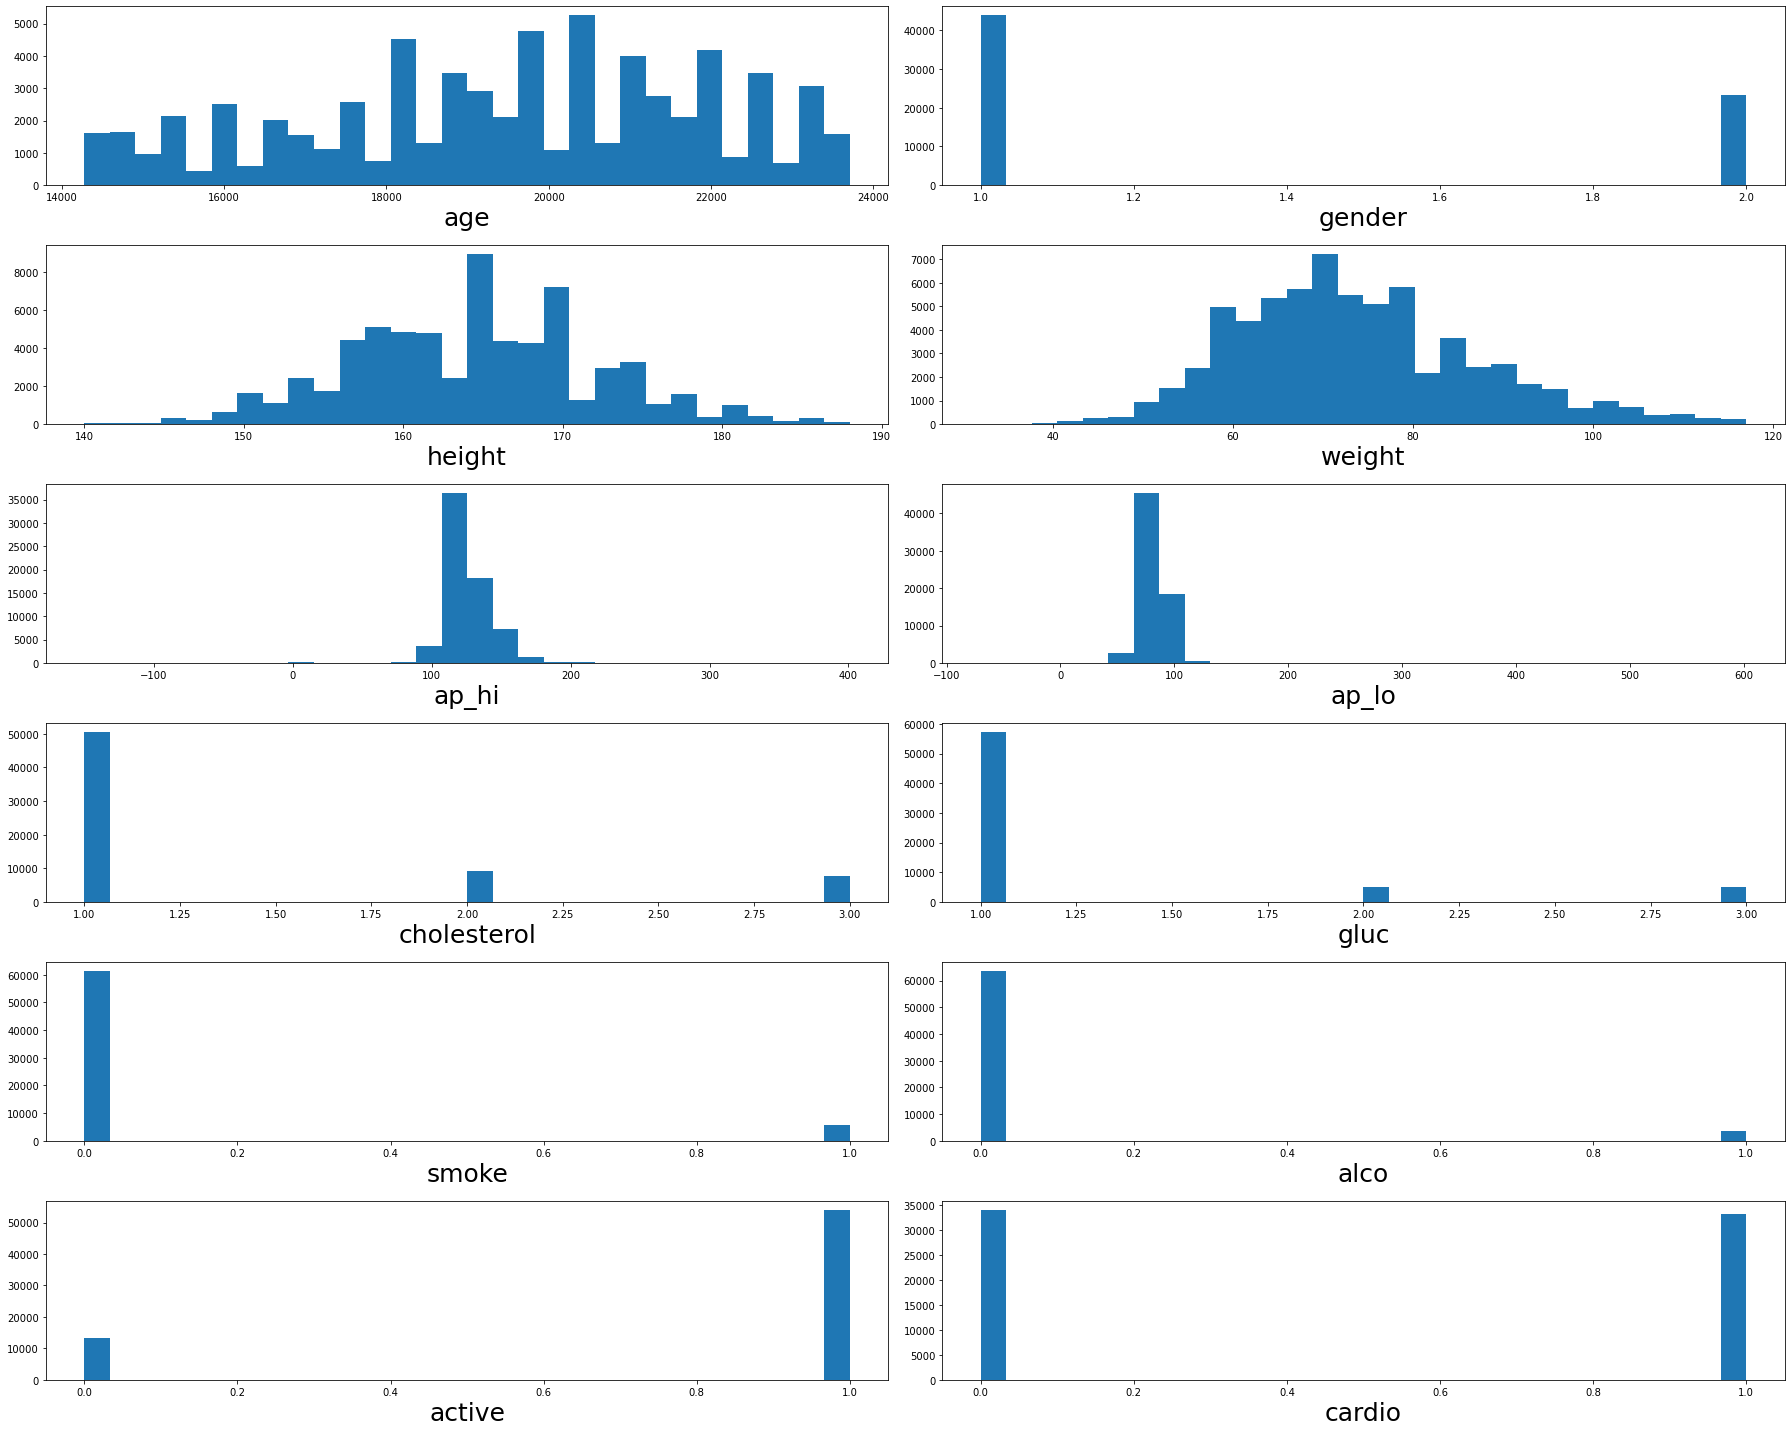

In [52]:
plt.figure(figsize=(25,20))
plotnumber =1
for column in df:
    if plotnumber<=12:
        ax = plt.subplot(6,2,plotnumber)
        plt.hist(df[column],bins=30)
        plt.xlabel(column,fontsize=25)
        
        plotnumber+=1
        
plt.tight_layout()       

In [53]:
x = df.drop(columns=['cardio'],axis=1)
y = df['cardio']

In [54]:
#cheaking overfitting

In [55]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
                    

In [56]:
vif = pd.DataFrame()
vif['score'] = [variance_inflation_factor (x_scaler,i) for i in range(x_scaler.shape[1])]
vif['feauture'] = x.columns
vif                      #if values are <5 then assume there is no overfitting

,score,feauture
0,1.071123,age
1,1.507506,gender
2,1.519844,height
3,1.221738,weight
4,1.658717,ap_hi
5,1.607891,ap_lo
6,1.317412,cholesterol
7,1.257853,gluc
8,1.248261,smoke
9,1.139820,alco


In [57]:
#RANDOM FORST CLASSIFIER

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=.25,random_state=41)

In [59]:
clf = RandomForestClassifier()

In [60]:
params = {'n_estimators':[13,15],
          'criterion':['entropy'],
          'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]
         }

In [61]:
grd = GridSearchCV(clf,param_grid=params)
grd.fit(x_train,y_train)
print('best_params = >',grd.best_params_)

clf = grd.best_estimator_
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

rf_conf_mat=confusion_matrix(y_test,y_pred)
print('conf_mat = >','\n',rf_conf_mat)

print('Accuracy.rf Normal ==>',accuracy_score(y_test,y_pred))


best_params = > {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 11, 'n_estimators': 15}
conf_mat = > 
 [[6797 1746]
 [2777 5520]]
Accuracy.rf Normal ==> 0.7314133016627078


In [62]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      8543
           1       0.76      0.67      0.71      8297

    accuracy                           0.73     16840
   macro avg       0.73      0.73      0.73     16840
weighted avg       0.73      0.73      0.73     16840



In [63]:
#lets plot ROC AUC curve to choose best model

In [65]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [67]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()

In [68]:
#TRAINING WITH ALL CLASSIFIERS

In [69]:
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
dt.fit(x_train,y_train)
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [70]:
lr.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
kn.score(x_test,y_test)

0.6986342042755345

In [71]:
#LETS FIND ROC AUC CURVE

In [75]:
roc_auc_score(y_test,rf.predict(x_test))


0.7115378122945905

In [76]:
roc_auc_score(y_test,lr.predict(x_test))


0.7267513233502823

In [77]:

roc_auc_score(y_test,dt.predict(x_test))



0.6385370544498279

In [78]:

roc_auc_score(y_test,kn.predict(x_test))

0.6983017770660461

In [73]:
#lets see curve

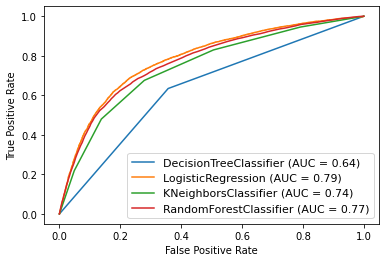

In [74]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()